In [1]:
import os
import pickle
import datetime
import numpy as np
import tensorflow as tf
import models.cifar10CNN
import models.WaveletCifar10CNN

from keras.datasets import cifar10
from sklearn.model_selection import KFold
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical, Sequence


Using TensorFlow backend.


In [2]:
weights_filepath = 'weights'
logs_filepath = 'logs'


if not os.path.exists(weights_filepath):
    os.makedirs(weights_filepath)

if not os.path.exists(logs_filepath):
    os.makedirs(logs_filepath)


In [3]:
nb_classes = 10
num_folds = 10
batch_size = 32
epochs = 30

lr = 1e-4  # learning rate
beta_1 = 0.9         # beta 1 - for adam optimizer
beta_2 = 0.96        # beta 2 - for adam optimizer
epsilon = 1e-7        # epsilon - for adam optimizer

trainFactor = 0.8
imageShape = (32, 32, 3)  # CIFAR-10 60,000 32X32 color


In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
optimizer = Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)  # SGD()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [7]:

# Create and Train the Model

model = models.WaveletCifar10CNN.WaveletCNN(imageShape, nb_classes)
history_file_path = "trainHistoryWaveletCifar10CNN.txt" # save loss and val loss

# model.summary()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])

h5_tmp = "tmp.h5"

history = model.fit(x_train, y_train,
                    validation_split=1 - trainFactor,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2,
                    callbacks=[
                        ModelCheckpoint(h5_tmp, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
                        EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
                        ],
                    )

model.load_weights(h5_tmp)
weights_path = os.path.join(weights_filepath, "WCNNN.h5")
model.save(weights_path)

# Model Evaluation
result = model.evaluate(x_test, y_test)

with open(history_file_path, 'wb') as f:
    pickle.dump(history.history, f)



Train on 40000 samples, validate on 10000 samples
Epoch 1/30
 - 29s - loss: 2.4951 - accuracy: 0.1668 - val_loss: 1.8960 - val_accuracy: 0.2792
Epoch 2/30
 - 28s - loss: 1.8783 - accuracy: 0.2975 - val_loss: 1.7341 - val_accuracy: 0.3787
Epoch 3/30
 - 29s - loss: 1.7069 - accuracy: 0.3702 - val_loss: 1.4878 - val_accuracy: 0.4581
Epoch 4/30
 - 28s - loss: 1.6103 - accuracy: 0.4083 - val_loss: 1.4079 - val_accuracy: 0.4943
Epoch 5/30
 - 28s - loss: 1.5248 - accuracy: 0.4444 - val_loss: 1.3574 - val_accuracy: 0.5144
Epoch 6/30
 - 29s - loss: 1.4767 - accuracy: 0.4617 - val_loss: 1.2811 - val_accuracy: 0.5417
Epoch 7/30
 - 28s - loss: 1.4130 - accuracy: 0.4910 - val_loss: 1.2643 - val_accuracy: 0.5400
Epoch 8/30
 - 28s - loss: 1.3668 - accuracy: 0.5089 - val_loss: 1.1882 - val_accuracy: 0.5764
Epoch 9/30
 - 29s - loss: 1.3238 - accuracy: 0.5272 - val_loss: 1.1660 - val_accuracy: 0.5831
Epoch 10/30
 - 29s - loss: 1.2713 - accuracy: 0.5464 - val_loss: 1.1710 - val_accuracy: 0.5826
Epoch 11

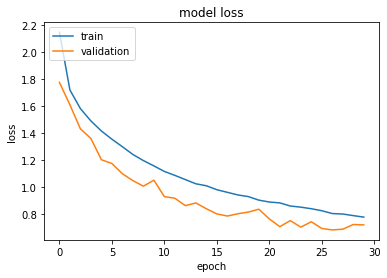

In [8]:
import pickle
import matplotlib.pyplot as plt

history_file_path = r"trainHistoryCifar10CNN.txt"

with open(history_file_path, 'rb') as pickle_file:
    history = pickle.load(pickle_file)


# plot train and validation loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()



